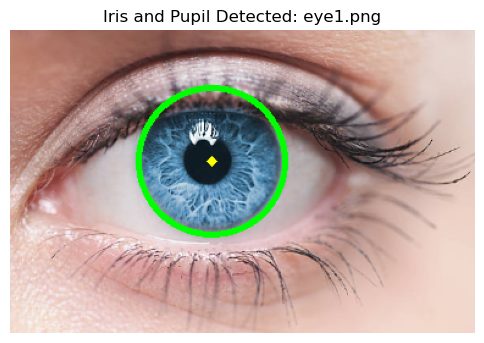

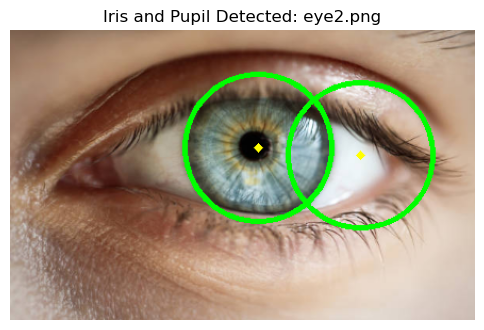

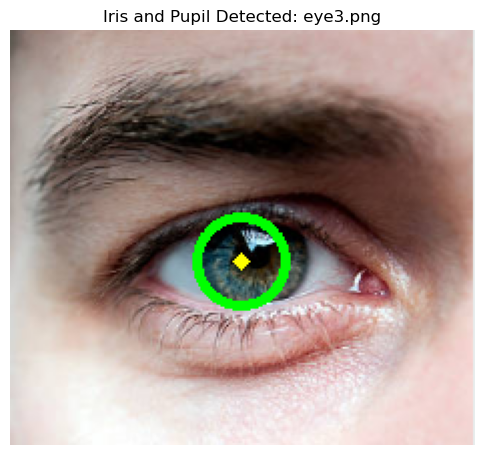

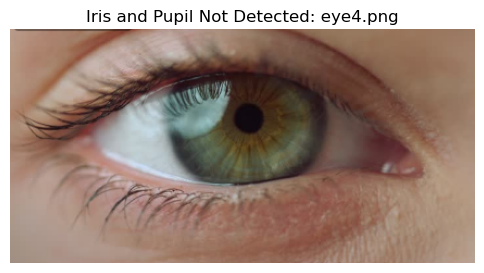

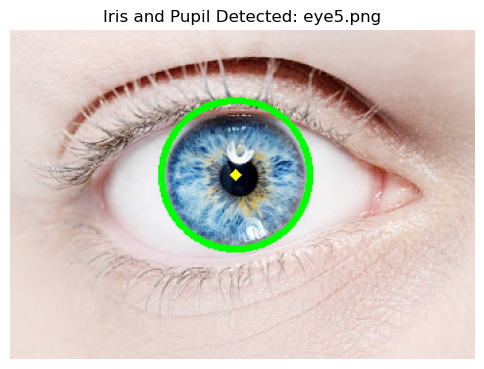

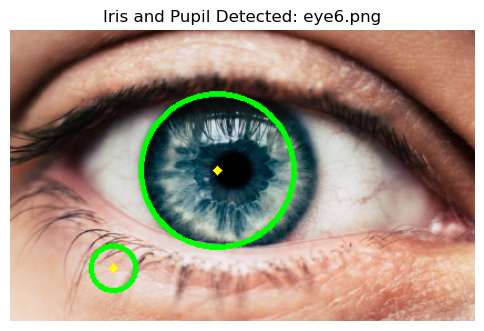

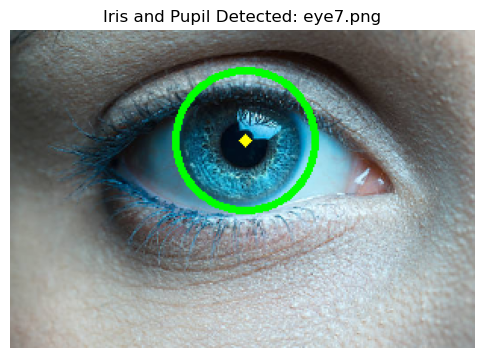

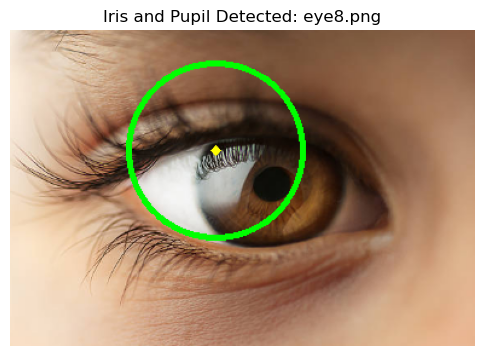

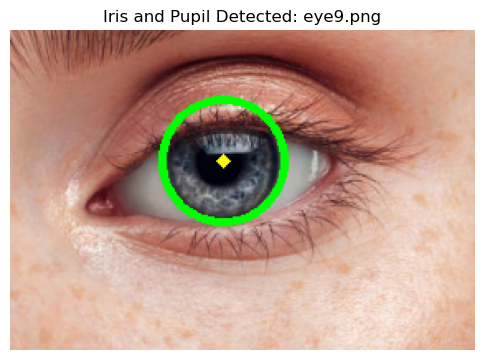

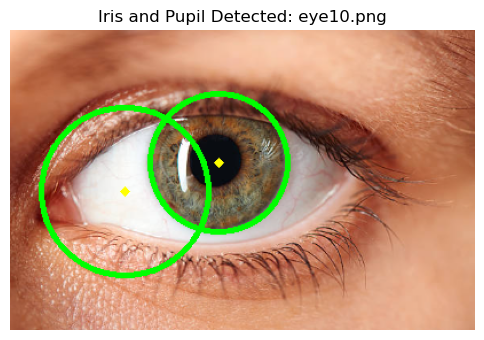

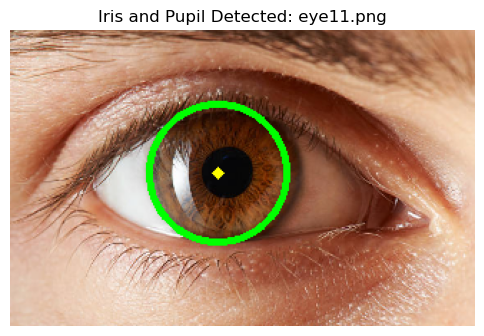

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# List of eye image URLs from your GitHub repository
image_urls = [
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye1.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye2.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye3.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye4.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye5.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye6.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye7.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye8.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye9.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye10.png',
    'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/eye11.png'
]

# Function to preprocess and detect iris and pupil
def detect_iris_pupil(image_url):
    # Load the image from URL
    resp = urllib.request.urlopen(image_url)
    image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    image = cv2.imdecode(image_array, -1)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Histogram Equalization to improve contrast
    gray = cv2.equalizeHist(gray)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)

    # Use HoughCircles method to detect circles (iris and pupil)
    circles = cv2.HoughCircles(blurred, 
                               cv2.HOUGH_GRADIENT, 
                               dp=1.2, 
                               minDist=80, 
                               param1=120,  # Edge detection sensitivity
                               param2=40,   # Circle detection sensitivity (lower for more circles)
                               minRadius=20, 
                               maxRadius=90)

    # If circles are detected, draw them
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            # Draw the outer circle (iris)
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            # Draw the center (pupil)
            cv2.circle(image, (x, y), 2, (0, 255, 255), 3)
        title = f"Iris and Pupil Detected: {image_url.split('/')[-1]}"
    else:
        title = f"Iris and Pupil Not Detected: {image_url.split('/')[-1]}"

    # Display the output image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

# Loop through each image URL and analyze
for url in image_urls:
    detect_iris_pupil(url)
